In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns 
plt.style.use('seaborn')
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('house_clean.csv')

In [3]:
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

# Exploring correlation

In [4]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
price,1.000000,0.283191,0.426600,0.587663,0.091171,0.262949,0.036707,0.192805,0.029584,0.600028,0.495720,0.219279,0.061039,-0.014223,0.451340,0.084751,0.533609,0.083089,0.458125
bedrooms,0.283191,1.000000,0.493301,0.604003,0.024490,0.154429,-0.037647,0.025211,0.023459,0.321651,0.475380,0.284514,0.175161,-0.158121,-0.045703,0.151659,0.383501,0.021599,-0.346892
bathrooms,0.426600,0.493301,1.000000,0.703585,0.056279,0.504842,-0.020921,0.068527,-0.139427,0.603509,0.623443,0.210651,0.562818,-0.216121,-0.025292,0.256112,0.519627,0.056531,-0.283636
sqft_living,0.587663,0.604003,0.703585,1.000000,0.152650,0.333544,-0.005507,0.137621,-0.075229,0.682950,0.844410,0.371639,0.362217,-0.212201,-0.011408,0.294977,0.728793,0.167867,-0.377851
sqft_lot,0.091171,0.024490,0.056279,0.152650,1.000000,-0.021045,0.015055,0.086915,-0.000006,0.083753,0.157187,0.007707,0.037134,-0.130534,-0.099545,0.222475,0.143607,0.708516,-0.047794
floors,0.262949,0.154429,0.504842,0.333544,-0.021045,1.000000,-0.011949,-0.021516,-0.279742,0.456375,0.529770,-0.306045,0.520532,-0.069893,0.028262,0.140277,0.266801,-0.025330,-0.060829
waterfront,0.036707,-0.037647,-0.020921,-0.005507,0.015055,-0.011949,1.000000,0.291056,0.014538,-0.018871,-0.013526,0.013335,-0.043094,0.038909,-0.045127,-0.060047,0.002008,0.034017,0.059292
view,0.192805,0.025211,0.068527,0.137621,0.086915,-0.021516,0.291056,1.000000,0.025830,0.102466,0.043612,0.176957,-0.069077,0.098514,-0.037349,-0.073621,0.157244,0.085093,0.071607
condition,0.029584,0.023459,-0.139427,-0.075229,-0.000006,-0.279742,0.014538,0.025830,1.000000,-0.178453,-0.181317,0.176181,-0.349273,-0.006835,-0.019640,-0.095431,-0.128643,0.005521,0.091149
grade,0.600028,0.321651,0.603509,0.682950,0.083753,0.456375,-0.018871,0.102466,-0.178453,1.000000,0.689352,0.058564,0.507365,-0.189938,0.068976,0.235467,0.653720,0.095821,-0.072970


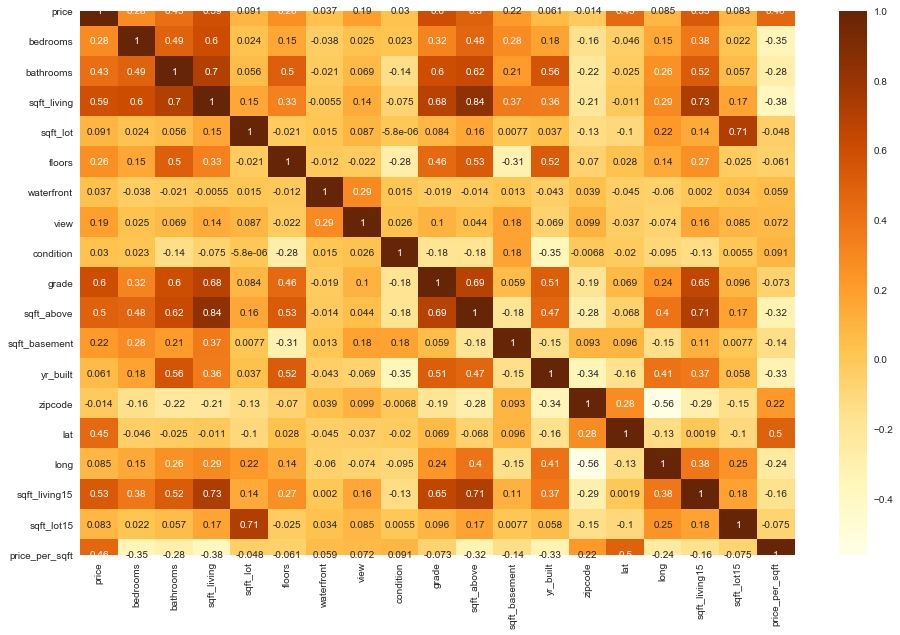

In [5]:
corr = data.corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap='YlOrBr', annot=True)

plt.show()

-Correlation is a statistical measure that suggests the level of linear dependence between two variables that occur in pair. 
 The value is between -1 to 1, where above 0 i considered a positive corilation between dependent and independent varaible and
 a any value below 0 is considered a negative corilation meaning there is a negative correlation between the dependent and independent
 varaible. A vale of 0 or close to 0 leads to a weak or nonexistant correlation. 


In [6]:
# Sort the highest/lowest correlated variables

high_corr = data.corr()['price'].sort_values(ascending=False)
high_corr

price             1.000000
grade             0.600028
sqft_living       0.587663
sqft_living15     0.533609
sqft_above        0.495720
price_per_sqft    0.458125
lat               0.451340
bathrooms         0.426600
bedrooms          0.283191
floors            0.262949
sqft_basement     0.219279
view              0.192805
sqft_lot          0.091171
long              0.084751
sqft_lot15        0.083089
yr_built          0.061039
waterfront        0.036707
condition         0.029584
zipcode          -0.014223
Name: price, dtype: float64

# Create dummies for Categorical 

In [7]:
# One hot encode function
def onehot_encode(data, column, prefix):
    data = data.copy()
    dummies = pd.get_dummies(data[column], prefix=prefix)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data

In [8]:
data = onehot_encode(data, 'zipcode', 'zip')

In [9]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19706,360000,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
19707,400000,4,2.50,2310,5813,2.0,0,0,3,8,...,1,0,0,0,0,0,0,0,0,0
19708,402101,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
19709,400000,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


# Check for Coliniarity 

-Multicollinearity occurs when your model includes multiple factors that are correlated not just to your
 independent variable, but also to each other. Multicollinearity increases the standard errors of the coefficients. 
 Increased standard errors can lead to coefficients that are difficult to interpret.

In [ ]:
data = sm.add_constant(data)

In [11]:
data

,const,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1.0,221900,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,1.0,538000,3,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,1.0,180000,2,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,1.0,604000,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1.0,510000,3,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19706,1.0,360000,3,2.50,1530,1131,3.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19707,1.0,400000,4,2.50,2310,5813,2.0,0,0,3,...,1,0,0,0,0,0,0,0,0,0
19708,1.0,402101,2,0.75,1020,1350,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19709,1.0,400000,3,2.50,1600,2388,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
co_lin = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

co_lin['pairs'] = list(zip(co_lin.level_0, co_lin.level_1))

co_lin.set_index(['pairs'], inplace = True)

co_lin.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
co_lin.columns = ['cc']

co_lin.drop_duplicates(inplace=True)

co_lin[(co_lin.cc>.7) & (co_lin.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.844410
"(sqft_living15, sqft_living)",0.728793
"(sqft_lot, sqft_lot15)",0.708516
"(sqft_living15, sqft_above)",0.708036
"(bathrooms, sqft_living)",0.703585


In [13]:
# Drop sqft_above - square footage of house apart from basement
# Many houses do not have basments or if they do the do not significanly add to sqft_living(overall square foot)
data.drop(columns = 'sqft_above', axis=1, inplace=True)

# Modeling

In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [14]:
data

,const,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1.0,221900,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,1.0,538000,3,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,1.0,180000,2,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,1.0,604000,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1.0,510000,3,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19706,1.0,360000,3,2.50,1530,1131,3.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19707,1.0,400000,4,2.50,2310,5813,2.0,0,0,3,...,1,0,0,0,0,0,0,0,0,0
19708,1.0,402101,2,0.75,1020,1350,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19709,1.0,400000,3,2.50,1600,2388,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [53]:
lm = sm.OLS(y, X)
model_3 = lm.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2591.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:58:55   Log-Likelihood:            -2.4241e+05
No. Observations:               19711   AIC:                         4.850e+05
Df Residuals:                   19625   BIC:                         4.857e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.358e+06   2.08e+06     -0.652      0.514   -5.44e+06    2.72e+06
bedrooms        6232.7061    587.058     10.617      0.000    5082.023    7383.389
bathrooms       1.303e+04    953.673     13.658      0.000    1.12e+04    1.49e+04
sqft_living      167.5004      1.279    130.933      0.000     164.993     170.008
sqft_lot           0.0767      0.014      5.458      0.000       0.049       0.104
floors            64.6912   1130.839      0.057      0.954   -2151.848    2281.231
waterfront      1.597e+04   8335.244      1.916      0.055    -368.561    3.23e+04
view            1.172e+04    718.903     16.303      0.000    1.03e+04    1.31e+04
condition       1.139e+04    665.756     17.115      0.000    1.01e+04    1.27e+04
grade           2.349e+04    671.119     35.003      0.000    2.22e+04    2.48e+04
sqft_basement     -8.4312      1.399     -6.025      0.000     -11.174      -5.689
yr_built        -277.3207     22.147    -12.522      0.000    -320.730    -233.912
lat             1.011e+05   2.19e+04      4.619      0.000    5.82e+04    1.44e+05
long            2.691e+04   1.56e+04      1.729      0.084   -3589.927    5.74e+04
sqft_living15      5.8542      1.132      5.174      0.000       3.636       8.072
sqft_lot15         0.0401      0.022      1.828      0.068      -0.003       0.083
price_per_sqft  1083.9092      7.243    149.652      0.000    1069.713    1098.106
zip_98001      -5.453e+04   2.89e+04     -1.886      0.059   -1.11e+05    2128.894
zip_98002      -4.347e+04   2.82e+04     -1.542      0.123   -9.87e+04    1.18e+04
zip_98003      -5.823e+04   2.95e+04     -1.971      0.049   -1.16e+05    -328.152
zip_98004       7.329e+04   3.06e+04      2.396      0.017    1.33e+04    1.33e+05
zip_98005       5.183e+04   3.01e+04      1.724      0.085   -7095.228    1.11e+05
zip_98006       2.912e+04   2.91e+04      1.000      0.317    -2.8e+04    8.62e+04
zip_98007        1.31e+04   2.98e+04      0.440      0.660   -4.52e+04    7.14e+04
zip_98008       2248.6226   2.93e+04      0.077      0.939   -5.52e+04    5.97e+04
zip_98010       -3.35e+04   2.56e+04     -1.309      0.191   -8.37e+04    1.67e+04
zip_98011      -4.765e+04   3.21e+04     -1.487      0.137    -1.1e+05    1.52e+04
zip_98014      -5.734e+04    2.7e+04     -2.122      0.034    -1.1e+05   -4374.909
zip_98019      -7.004e+04   2.89e+04     -2.421      0.015   -1.27e+05   -1.33e+04
zip_98022      -5.309e+04   2.45e+04     -2.168      0.030   -1.01e+05   -5082.654
zip_98023      -6.761e+04   3.02e+04     -2.236      0.025   -1.27e+05   -8354.000
zip_98024      -3.382e+04   2.66e+04     -1.272      0.203   -8.59e+04    1.83e+04
zip_98027      -7224.7020   2.73e+04     -0.264      0.792   -6.08e+04    4.63e+04
zip_98028      -4.943e+04   3.25e+04     -1.519      0.129   -1.13e+05    1.44e+04
zip_98029   

In [ ]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [22]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model_3.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model_3.predict(X_test))))
print('MSE difference:', np.sqrt(mean_squared_error(y_train, model_3.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_3.predict(X_test))))
print('10 Cross Validation R^2 score for train:', cross_val_score(linreg, X_train, y_train, cv=10, scoring='r2').mean())
print('10 Cross Validation R^2 score for test:', cross_val_score(linreg, X_test, y_test, cv=10, scoring='r2').mean())

MSE for train set: 52601.562460458845
MSE for test set: 55016.381633120254
MSE difference: -2414.8191726614095
10 Cross Validation R^2 score for train: 0.9179296811568672
10 Cross Validation R^2 score for test: 0.9114498503706855


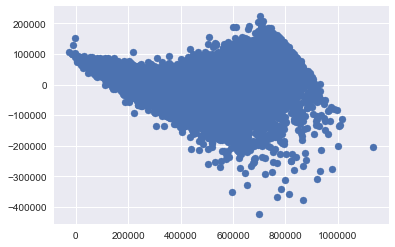

In [33]:
plt.scatter(model_3.predict(X_train), model_3.resid)


# Feature Selection

In [46]:
# Extract the p-value table from the summary and use it to subset our features
summary = model_3.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

87 26
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-1.358e+06,2.08e+06,-0.652,0.514,-5.44e+06,2.72e+06
bedrooms,6232.7061,587.058,10.617,0.000,5082.023,7383.389
bathrooms,1.303e+04,953.673,13.658,0.000,1.12e+04,1.49e+04
sqft_living,167.5004,1.279,130.933,0.000,164.993,170.008
sqft_lot,0.0767,0.014,5.458,0.000,0.049,0.104


In [47]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [48]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_living15                  with p-value 0.0
Add  price_per_sqft                 with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  floors                         with p-value 0.0
Add  grade                          with p-value 0.0
Add  const                          with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Drop floors                         with p-value 0.128984


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  lat                            with p-value 2.83453e-264
Add  condition                      with p-value 5.78872e-81
Add  zip_98040                      with p-value 4.13831e-52
Add  zip_98006                      with p-value 1.57596e-37
Drop sqft_basement                  with p-value 0.0738483
Add  view                           with p-value 6.4917e-39
Add  zip_98155                      with p-value 9.81323e-37
Add  zip_98133                      with p-value 1.02682e-41
Add  zip_98028                      with p-value 1.49792e-31
Add  zip_98019                      with p-value 7.44756e-31
Add  zip_98005                      with p-value 2.25184e-30
Add  zip_98004                      with p-value 2.69038e-28
Add  zip_98011                      with p-value 2.03299e-27
Add  zip_98125                      with p-value 9.7399e-28
Add  zip_98034                      with p-value 5.0261e-31
Add  zip_98072                      with p-value 5.6136e-27
Add  zip_98022               

In [54]:
X = X[result]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
lm = sm.OLS(y_train, X_train)
model_2 = lm.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2814.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:59:54   Log-Likelihood:            -1.9383e+05
No. Observations:               15768   AIC:                         3.878e+05
Df Residuals:                   15704   BIC:                         3.883e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living15      5.7552      1.220      4.717      0.000       3.364       8.147
price_per_sqft  1100.3271      7.670    143.460      0.000    1085.293    1115.361
grade           2.331e+04    732.405     31.825      0.000    2.19e+04    2.47e+04
const          -1.368e+07    3.4e+05    -40.196      0.000   -1.43e+07    -1.3e+07
bedrooms        6370.9119    646.033      9.862      0.000    5104.613    7637.210
sqft_living      168.0949      1.386    121.259      0.000     165.378     170.812
lat             2.907e+05   7095.332     40.975      0.000    2.77e+05    3.05e+05
condition       1.168e+04    735.279     15.891      0.000    1.02e+04    1.31e+04
zip_98040       9.595e+04   5700.928     16.830      0.000    8.48e+04    1.07e+05
zip_98006       4.252e+04   3408.461     12.476      0.000    3.58e+04    4.92e+04
view            1.193e+04    764.024     15.611      0.000    1.04e+04    1.34e+04
zip_98155      -7.891e+04   3402.740    -23.191      0.000   -8.56e+04   -7.22e+04
zip_98133      -7.174e+04   3216.353    -22.305      0.000    -7.8e+04   -6.54e+04
zip_98028      -7.747e+04   3983.178    -19.449      0.000   -8.53e+04   -6.97e+04
zip_98019      -8.632e+04   4692.968    -18.393      0.000   -9.55e+04   -7.71e+04
zip_98005        5.07e+04   5155.315      9.834      0.000    4.06e+04    6.08e+04
zip_98004       7.269e+04   5762.365     12.615      0.000    6.14e+04     8.4e+04
zip_98011      -7.327e+04   4706.360    -15.569      0.000   -8.25e+04    -6.4e+04
zip_98125      -5.298e+04   3381.274    -15.670      0.000   -5.96e+04   -4.64e+04
zip_98034      -4.802e+04   3073.738    -15.622      0.000    -5.4e+04    -4.2e+04
zip_98072      -5.543e+04   4169.079    -13.296      0.000   -6.36e+04   -4.73e+04
zip_98022       3.272e+04   4469.624      7.321      0.000     2.4e+04    4.15e+04
bathrooms       1.336e+04   1021.590     13.075      0.000    1.14e+04    1.54e+04
yr_built        -277.9329     22.467    -12.371      0.000    -321.971    -233.894
zip_98075       2.717e+04   3555.341      7.643      0.000    2.02e+04    3.41e+04
zip_98029       2.516e+04   3577.236      7.032      0.000    1.81e+04    3.22e+04
zip_98112       3.994e+04   5456.067      7.320      0.000    2.92e+04    5.06e+04
zip_98027       1.645e+04   3172.684      5.185      0.000    1.02e+04    2.27e+04
zip_98177      -4.639e+04   4410.060    -10.519      0.000    -5.5e+04   -3.77e+04
zip_98077      -4.928e+04   4877.316    -10.105      0.000   -5.88e+04   -3.97e+04
sqft_lot           0.0754      0.012      6.301      0.000       0.052       0.099
zip_98014      -5.508e+04   5707.277     -9.651      0.000   -6.63e+04   -4.39e+04
zip_98002       1.795e+04   4716.517      3.807      0.000    8709.045    2.72e+04
zip_98117       -2.53e+04   2962.547     -8.538      0.000   -3.11e+04   -1.95e+04
zip_98058   

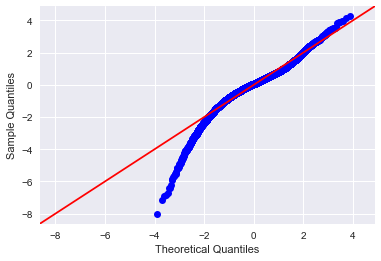

In [42]:
fig = sm.graphics.qqplot(model_final.resid, dist=stats.norm, line='45', fit=True)

In [62]:
print('RMSE for train set:', np.sqrt(mean_squared_error(y_train, model_final.predict(X_train))))
print('RMSE for test set:', np.sqrt(mean_squared_error(y_test, model_final.predict(X_test))))
print('RMSE difference:', np.sqrt(mean_squared_error(y_train, model_final.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_final.predict(X_test))))
print('10 Cross Validation R^2 score for train:', cross_val_score(linreg, X_train, y_train, cv=10, scoring='r2').mean())
print('10 Cross Validation R^2 score for test:', cross_val_score(linreg, X_test, y_test, cv=10, scoring='r2').mean())

RMSE for train set: 52809.0694374566
RMSE for test set: 54877.40702905297
RMSE difference: -2068.3375915963697
10 Cross Validation R^2 score for train: 0.917662066078903
10 Cross Validation R^2 score for test: 0.9118442675351133
